---
# Why Dimensionality Reduction?
---
# Why Do We Need Dimensionality Reduction?

When working with big data, we often work with data that has a lot of columns -- or a lot of dimensions. Machine learning is a great tool to use with high dimensional data because it can pick up on patterns in high dimensional spaces that would be impossible for humans to pick up on. However, challenges can arise when working with high dimensional data.

The "curse of dimensionality" refers to a phenomenon that arises when working in increasingly higher dimensional spaces - as the number of features increases, the amount of data needed to accurately generalize a model to new data grows exponentially.

Dimensionality reduction refers to any technique where we try to reduce the feature space we are working with. In general, there are two types of dimensionality reduction:

    1. Feature Selection
    2. Feature Extraction

## Feature Selection

You have already been doing feature selection! This is the process of selecting a subset of features to model on. For example, if you are building a model to predict the price of homes, you can choose to use only the top most important features in your final model and leave out the features that may not be important to the model.

But what if you don't know which features to choose?
## Feature Extraction

Feature extraction refers to techniques where you take all of your features and combine them in certain ways to reduce them into lower dimensions.

Some popular methods of feature extraction include:

    - Principal Component Analysis (PCA)
    - Linear Discriminant Analysis (LDA)


---

# Principal Component Analysis (PCA)

Learning Objectives:

    - Explain generally how PCA works.
    - State the use cases of PCA.
    - State the assumptions of PCA.

# PCA

Principal Component Analysis, abbreviated as PCA, is one of the most common techniques used for dimensionality reduction.
It is an unsupervised learning technique, meaning we do not use a target/y-vector for this technique! PCA is applied to our features and is used to reduce the dimensions of our dataset.

PCA transforms our features into a new set of variables called Principal Components, which are linear combinations of all of our original features. The algorithm relies heavily on linear algebra topics and understanding the math behind it is beyond the scope of this course, but if you are interested in learning more about how the algorithm works behind the scenes, check out the optional sections at the end of this chapter.

The Principal Components (PCs) are arranged in order of how much variability they explain: the first PC explains the most variance of our original data, while the last PC explains the least amount of variation of our original data. We choose a select number of PCs that cumulatively explain enough variance in our data yet still reduces the dimensionality of our feature space.
# Uses of PCA

PCA is useful for two main tasks:

    - Visualization: if we have high-dimensional data that would be impossible to visualize, sometimes by transforming that data into a lower-dimensional space we can visualize things like clusters.
    - Dimensionality reduction to improve model speed: we can use PCA to first reduce the dimensions of our data, then use the PCs for modeling.

# Assumptions of PCA

When doing PCA, we assume:

    - There are linear relationships between our features.
    - Importance is determined from variance, i.e. higher variance means it is more important.
    - All of our original features have the same units (if they don't, you need to scale your data!).



# PCA for Data Visualization

Learning Objectives:

    - Use PCA to visualize high dimensional data.
---
**Note**: you can watch a video walkthrough of this code at the end of this module.
# PCA for Data Visualization

One common application of PCA is to transform our data into lower-dimensional spaces in order to visualize it, a task that is impossible to do when we are working with more than 3 dimensions.
## Create Data Visualizations using PCA in Python

Let's try this in Python!
### 1. **Import Libraries.**

In [67]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

The data we will use here is from [this source](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/) and describes information about various types of iris flowers.

Let's say we want to cluster the data into different flower varieties. We might want to visually check how many clusters would be reasonable. Notice that we have several dimensions here and it would be tough to visualize this data as-is (we could only visualize a few features at a time).

We can use PCA to transform this data into less dimensions!
### 2. **Load the Dataset.**

In [68]:
# We can get the Iris dataset from the UCI datasets
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names = ['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Split data into X and y.

In [69]:
# Save X data
X = df.drop(columns='target')
# Encode our target
le = LabelEncoder()
y = le.fit_transform(df['target'])

### 4. Scale Data.

In [70]:
# Instatiat Standard Scaler
scaler = StandardScaler()
# Fit and transform data.
scaled_df = scaler.fit_transform(X)

### 5. Apply PCA.

In [71]:
# Instatiate, fit & transform data using PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_df)

### 6. Use Outputs of PCA to Visualize the Data.

Text(0, 0.5, 'PC2')

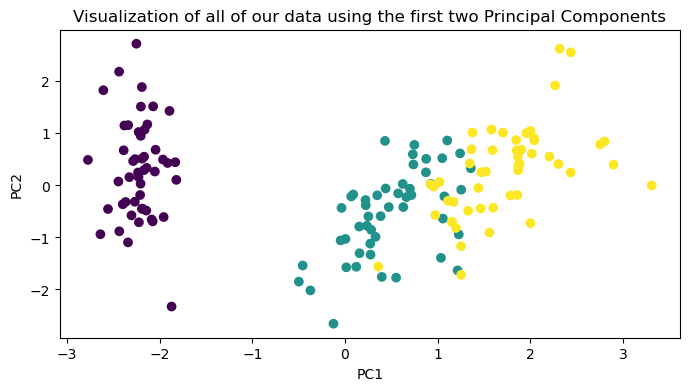

In [72]:
# Visualize the first 2 PCs
plt.figure(figsize=(8,4))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

We can now clearly visualize the clusters in our dataset (which originally had 4 dimensions)!

---

# PCA to Speed up Machine Learning Algorithms

Learning Objectives:

    - Determine an optimal number of components for PCA.
    - Apply PCA to a supervised machine learning model.

# PCA for Supervised Machine Learning

Note: you can watch a video walkthrough of this code at the end of this module.

PCA itself is an unsupervised machine learning task. However, it is often used in conjunction with a supervised machine learning model to reduce the dimensions used in the algorithm and therefore improve speed.
# Using PCA to speed up a supervised machine learning model in Python

Let's try this in Python using the [Wisconsin breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). You can download the data [here](https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/wisconsinBreastCancer.csv). Note that this is a relatively small dataset and PCA works best on many dimensions.

## 1. Import Libraries.

In [73]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

## 2. Load the Dataset.

In [74]:
# Get data
df = pd.read_csv(r'C:\Users\zachd\OneDrive\Documents\GitHub\Practice\Week 2\wisconsinBreastCancer.csv', index_col = 'id')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 3. Prepare Dataset for Machine Learning.

In [75]:
# Drop unnecessary column
df.drop(columns='Unnamed: 32', inplace=True)
# Binarize target column
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
# Save X data
X = df.drop(columns='diagnosis')
# Encode our target
y = df['diagnosis']

In [76]:
X.shape

(569, 30)

Notice that this dataset has 30 columns/dimensions. While this isn't very many, we can use PCA to reduce that number while still retaining information from all of the columns.

## 4. Scale Data.

Data should always be scaled before applying PCA. PCA is a distanced based algorithm.

In [77]:
# Instatiate Standard Scaler
scaler = StandardScaler()
# Fit and transform data
scaled_df = scaler.fit_transform(X)

## 5. Fit PCA

In [78]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

By default PCA will return the same number of principal components as the original number of features. Together, these components will explain 100% of the variance, even though they are not the same as the original features. Note however, that using as many principal components as the number of original features does <u>not</u> serve the purpose of dimensionality reduction! Since our goal is to reduce the number of features, we have to be willing to give up some information. The goal is to find the appropriate balance where we reduce the number features, but still maintain a high enough proportion of variance explained.

---
# Choosing the Number of Components to Return

Choosing more principal components will always increase the cumulative amount of variance explained by the components. (The more principal components, the more information we are retaining).

We can visualize the cumulative variance explained by returning more components with the following code:

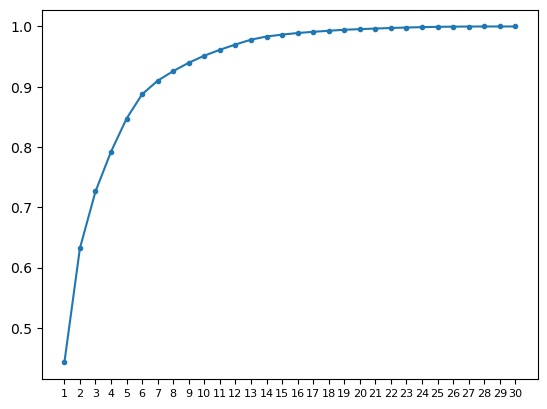

In [79]:
# Plot the cumulative sum of the percentage of explained variance for each component and thos before it.
plt.plot(range(1,31), pca.explained_variance_ratio_.cumsum(), marker='.')
plt.xticks(ticks=range(1,31), fontsize=8);

### Increasing Components Increases the Cumulative Variance Explained

The graph above shows the cumulative variance explained as the number of principal components returned increases. As you can see, there are dramatic increases in the proportion of explained variance at first, but this starts to level off as we incrementally add more components. The first principle component will always explain the most variance. Successive components will continue to explain more, but in order to reduce the number of features, we need to be willing to sacrifice some of this explanation.

# Visualize Scree Plot

We can visualize the individual contribution of each principal component using a Scree plot:

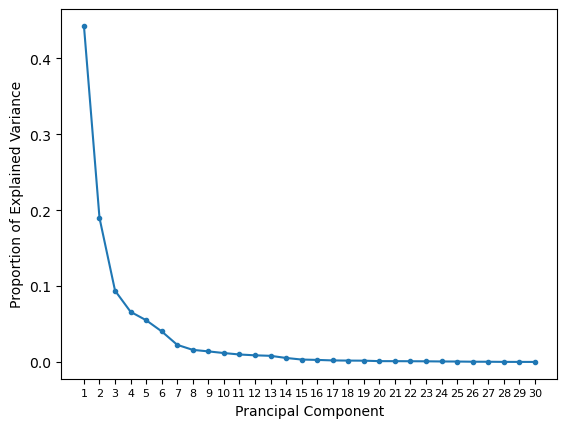

In [80]:
# Plot the explained variance ratios for the first 30 principal components
plt.plot(range(1,31), pca.explained_variance_ratio_, marker='.')
plt.xticks(ticks=range(1,31), fontsize=8)
plt.xlabel('Prancipal Component')
plt.ylabel('Proportion of Explained Variance');

A scree plot conveys the same information as the cumulative plot, but it tracks the contribution of each component separately. As you can see, the first component explains the largest proportion of variance, and each additional component contributes less and less. Even though this graph is decreasing, remember that increasing the number of components always increases the overall (cumulative) variance explained.

# Elbow Method

Based on the graph above, how many principal components should we keep? The "elbow" or inflection point on the graph above can be seen around 7 principal components. This is where we don't get much benefit from further increasing the number of components, so it represents a good balance.

The code below shows how to specify the number of components to return when you instantiate PCA: 

In [81]:
# PCA with 7 components
pca7 = PCA(n_components=7)

The above PCA model will return 7 components.

# Specifying the Explained Variance

Rather than specifying the number of components to return, an alternate method is to specify the minimum proportion of explained variance you are willing to accept. PCA will automatically reduce the number of components just enough to meet your specification.

To specify the proportion of variance, give the n_components argument a float between 0 and 1, and it will return the number of components required to explain the given variance.

The code below is an example of how to ensure that enough components are returned to explain 85% of the variance:

In [82]:
# PCA with 85% explained variance
pca85 = PCA(n_components=.85)

--- 

# Example of PCA with Supervised Learning

Let's now use the principal components to build a logistic regression model to predict malignant cells.

### Split Data into Training & Testing Sets

In [83]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Create a PCA Pipeline with Standard Scaler

PCA works great in a pipeline to simplify our code and prevent data leakage. Remember we always scale data before applying PCA!

The scree plot above seemed to level off at about 7 components. That's how many we will use in our PCA

In [84]:
# Create a transformer pipeline
transformer = make_pipeline(StandardScaler(), PCA(n_components=7))

### Put the PCA Pipeline in Another Pipeline with a Logistic Regression

In [85]:
logreg = LogisticRegression()
# Create a modeling pipeline
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=7))])),
                ('logisticregression', LogisticRegression())])

### Evaluate Model

In [86]:
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.9741784037558685
Testing accuracy: 0.986013986013986


Nice! We went from 30 features to only seven features and we still have a testing accuracy of about 97% on our testing data!

---